In [1]:
import pandas as pd
import numpy as np
import os

DATA_DIR = '/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/sourcedata'
ANNOT_DIR = '/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/celltype_annotations'
# Load the data

svz_cellcentroids = pd.read_csv(DATA_DIR + '/cortex_svz_cellcentroids.csv', header=0)
svz_counts = pd.read_csv(DATA_DIR + '/cortex_svz_counts.csv', header=0)
cell_annot = pd.read_csv(ANNOT_DIR + '/cortex_svz_cell_type_annotations.csv', header=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/sourcedata/cortex_svz_cellcentroids.csv'

In [2]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region
0,0,1,1305.70,414.98,Cortex
1,0,2,669.51,457.53,Cortex
2,0,3,1185.90,507.11,Cortex
3,0,4,710.24,533.06,Cortex
4,0,5,763.87,569.15,Cortex


In [3]:
svz_counts.shape

(913, 10000)

In [4]:
cell_annot.shape

(913, 2)

In [5]:
svz_cellcentroids['louvain'] = cell_annot['louvain']

In [6]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain
0,0,1,1305.70,414.98,Cortex,13
1,0,2,669.51,457.53,Cortex,3
2,0,3,1185.90,507.11,Cortex,3
3,0,4,710.24,533.06,Cortex,7
4,0,5,763.87,569.15,Cortex,6


In [7]:
cell_type_mapping = {
    1: 'Choroid plexus',
    3: 'Excitatory neuron',
    4: 'Excitatory neuron',
    5: 'Excitatory neuron',
    6: 'Excitatory neuron',
    9: 'Excitatory neuron',
    11: 'Excitatory neuron',
    13: 'Excitatory neuron',
    18: 'Excitatory neuron',
    7: 'Interneuron',
    23: 'Interneuron',
    8: 'Neural Stem',
    14: 'Neural Stem',
    15: 'Neural Progenitors',
    24: 'Neural Progenitors',
    12: 'Neuroblasts',
    17: 'Neuroblasts',
    21: 'Neuroblasts',
    2: 'Endothelial',
    10: 'Astrocytes',
    19: 'Astrocytes',
    16: 'Oligodendrocytes',
    20: 'Microglia',
    22: 'Ependymal',
    25: 'Oligo Precursor',
    26: 'Unannotated'
}

svz_cellcentroids['celltype'] = svz_cellcentroids['louvain'].map(cell_type_mapping)

In [8]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron
3,0,4,710.24,533.06,Cortex,7,Interneuron
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron


In [9]:
svz_cellcentroids["cellname"] = svz_cellcentroids["Field of View"].astype(str) + "_" + svz_cellcentroids["Cell ID"].astype(str)

In [10]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron,0_1
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron,0_2
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron,0_3
3,0,4,710.24,533.06,Cortex,7,Interneuron,0_4
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron,0_5


In [11]:
with open(DATA_DIR + '/groundtruth_labels.txt', 'w') as f:
    for i in svz_cellcentroids['celltype']:
        f.write(i + '\n')

In [11]:
svz_counts.head()

,1700022a21rik,1700025g04rik,4933401b06rik,5830417i10rik,9330102e08rik,9430018g01rik,9430083a17rik,Aanat,Aasdh,Aatf,...,Tyrp1,Ubqlnl,Ptgdr,P2ry4,Prdm6,Pde6b,Zp1,Dlx4,Opn1sw,Pramef12
0,3,1,2,0,1,1,1,0,2,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,2,2,1,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,3,0,...,1,0,0,1,0,0,0,1,0,0


In [12]:
svz_gene_exp = svz_counts
svz_gene_exp.index = svz_cellcentroids['cellname']

In [13]:
svz_gene_exp.head()

,1700022a21rik,1700025g04rik,4933401b06rik,5830417i10rik,9330102e08rik,9430018g01rik,9430083a17rik,Aanat,Aasdh,Aatf,...,Tyrp1,Ubqlnl,Ptgdr,P2ry4,Prdm6,Pde6b,Zp1,Dlx4,Opn1sw,Pramef12
cellname,,,,,,,,,,,,,,,,,,,,,
0_1,3,1,2,0,1,1,1,0,2,0,...,0,0,1,0,0,0,0,0,0,1
0_2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
0_3,0,0,1,1,0,0,0,0,0,0,...,2,2,1,1,0,0,1,0,1,0
0_4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0_5,0,0,0,1,0,1,1,0,3,0,...,1,0,0,1,0,0,0,1,0,0


In [100]:
svz_gene_exp.to_csv(DATA_DIR + '/svz_gene_expression_10000_genes.csv')

In [14]:
# rank the row of svz_cellcentroids by 1) X, 2) Y
svz_cellcentroids.sort_values(by=['X'], inplace=True)

In [15]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname
32,0,33,103.12,1244.60,Cortex,3,Excitatory neuron,0_33
107,0,108,113.16,1090.70,Cortex,13,Excitatory neuron,0_108
69,0,70,152.20,367.61,Cortex,6,Excitatory neuron,0_70
303,2,78,174.80,1240.00,Cortex,18,Excitatory neuron,2_78
182,1,65,176.20,1138.30,Cortex,9,Excitatory neuron,1_65


In [16]:
# range of X and Y
print(svz_cellcentroids['X'].min(), svz_cellcentroids['X'].max())
print(svz_cellcentroids['Y'].min(), svz_cellcentroids['Y'].max())

# partition the data into 10x10 grid
X_range = np.linspace(svz_cellcentroids['X'].min(), svz_cellcentroids['X'].max(), 11)
Y_range = np.linspace(svz_cellcentroids['Y'].min(), svz_cellcentroids['Y'].max(), 11)

print(X_range)
print(Y_range)

for i in range(10):
    for j in range(10):
        x_min = X_range[i]
        x_max = X_range[i+1]
        y_min = Y_range[j]
        y_max = Y_range[j+1]
        cell_in_grid = svz_cellcentroids[(svz_cellcentroids['X'] >= x_min) & (svz_cellcentroids['X'] <= x_max) & (svz_cellcentroids['Y'] >= y_min) & (svz_cellcentroids['Y'] <= y_max)]
        print(f'Grid {i+1}_{j+1}: {cell_in_grid.shape[0]} cells')

# partition the data into 10x10 grid w.r.t. the grids information above
svz_cellcentroids['grid'] = 0
for i in range(10):
    for j in range(10):
        x_min = X_range[i]
        x_max = X_range[i+1]
        y_min = Y_range[j]
        y_max = Y_range[j+1]
        cell_in_grid = svz_cellcentroids[(svz_cellcentroids['X'] >= x_min) & (svz_cellcentroids['X'] <= x_max) & (svz_cellcentroids['Y'] >= y_min) & (svz_cellcentroids['Y'] <= y_max)]
        svz_cellcentroids.loc[cell_in_grid.index, 'grid'] = f'{i+1}_{j+1}'

svz_cellcentroids.head()

103.12 1960.0
122.03 1903.3
[ 103.12   288.808  474.496  660.184  845.872 1031.56  1217.248 1402.936
 1588.624 1774.312 1960.   ]
[ 122.03   300.157  478.284  656.411  834.538 1012.665 1190.792 1368.919
 1547.046 1725.173 1903.3  ]
Grid 1_1: 1 cells
Grid 1_2: 2 cells
Grid 1_3: 1 cells
Grid 1_4: 3 cells
Grid 1_5: 5 cells
Grid 1_6: 7 cells
Grid 1_7: 4 cells
Grid 1_8: 3 cells
Grid 1_9: 1 cells
Grid 1_10: 0 cells
Grid 2_1: 2 cells
Grid 2_2: 3 cells
Grid 2_3: 14 cells
Grid 2_4: 11 cells
Grid 2_5: 18 cells
Grid 2_6: 14 cells
Grid 2_7: 11 cells
Grid 2_8: 11 cells
Grid 2_9: 10 cells
Grid 2_10: 6 cells
Grid 3_1: 3 cells
Grid 3_2: 7 cells
Grid 3_3: 8 cells
Grid 3_4: 9 cells
Grid 3_5: 19 cells
Grid 3_6: 21 cells
Grid 3_7: 15 cells
Grid 3_8: 6 cells
Grid 3_9: 11 cells
Grid 3_10: 3 cells
Grid 4_1: 5 cells
Grid 4_2: 8 cells
Grid 4_3: 12 cells
Grid 4_4: 12 cells
Grid 4_5: 19 cells
Grid 4_6: 16 cells
Grid 4_7: 13 cells
Grid 4_8: 7 cells
Grid 4_9: 10 cells
Grid 4_10: 1 cells
Grid 5_1: 5 cells
Grid 5_2:

/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_86372/2626158154.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1_1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  svz_cellcentroids.loc[cell_in_grid.index, 'grid'] = f'{i+1}_{j+1}'


,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,grid
32,0,33,103.12,1244.60,Cortex,3,Excitatory neuron,0_33,1_7
107,0,108,113.16,1090.70,Cortex,13,Excitatory neuron,0_108,1_6
69,0,70,152.20,367.61,Cortex,6,Excitatory neuron,0_70,1_2
303,2,78,174.80,1240.00,Cortex,18,Excitatory neuron,2_78,1_7
182,1,65,176.20,1138.30,Cortex,9,Excitatory neuron,1_65,1_6


In [17]:
grid_spot = {
    '1_1': '1', '1_2': '2', '1_3': '3', '1_4': '4', '1_5': '5', '1_6': '6', '1_7': '7', '1_8': '8', '1_9': '9', '1_10': '10',
    '2_1': '11', '2_2': '12', '2_3': '13', '2_4': '14', '2_5': '15', '2_6': '16', '2_7': '17', '2_8': '18', '2_9': '19', '2_10': '20',
    '3_1': '21', '3_2': '22', '3_3': '23', '3_4': '24', '3_5': '25', '3_6': '26', '3_7': '27', '3_8': '28', '3_9': '29', '3_10': '30',
    '4_1': '31', '4_2': '32', '4_3': '33', '4_4': '34', '4_5': '35', '4_6': '36', '4_7': '37', '4_8': '38', '4_9': '39', '4_10': '40',
    '5_1': '41', '5_2': '42', '5_3': '43', '5_4': '44', '5_5': '45', '5_6': '46', '5_7': '47', '5_8': '48', '5_9': '49', '5_10': '50',
    '6_1': '51', '6_2': '52', '6_3': '53', '6_4': '54', '6_5': '55', '6_6': '56', '6_7': '57', '6_8': '58', '6_9': '59', '6_10': '60',
    '7_1': '61', '7_2': '62', '7_3': '63', '7_4': '64', '7_5': '65', '7_6': '66', '7_7': '67', '7_8': '68', '7_9': '69', '7_10': '70',
    '8_1': '71', '8_2': '72', '8_3': '73', '8_4': '74', '8_5': '75', '8_6': '76', '8_7': '77', '8_8': '78', '8_9': '79', '8_10': '80',
    '9_1': '81', '9_2': '82', '9_3': '83', '9_4': '84', '9_5': '85', '9_6': '86', '9_7': '87', '9_8': '88', '9_9': '89', '9_10': '90',
    '10_1': '91', '10_2': '92', '10_3': '93', '10_4': '94', '10_5': '95', '10_6': '96', '10_7': '97', '10_8': '98', '10_9': '99', '10_10': '100'
}

svz_cellcentroids['spot'] = svz_cellcentroids['grid'].map(grid_spot)
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,grid,spot
32,0,33,103.12,1244.60,Cortex,3,Excitatory neuron,0_33,1_7,7
107,0,108,113.16,1090.70,Cortex,13,Excitatory neuron,0_108,1_6,6
69,0,70,152.20,367.61,Cortex,6,Excitatory neuron,0_70,1_2,2
303,2,78,174.80,1240.00,Cortex,18,Excitatory neuron,2_78,1_7,7
182,1,65,176.20,1138.30,Cortex,9,Excitatory neuron,1_65,1_6,6


In [18]:
svz_cellcentroids['spot'] = svz_cellcentroids['spot'].astype(int)
svz_cellcentroids.sort_values(by = 'spot', inplace=True, ascending=True)
print(svz_cellcentroids['spot'].value_counts())
svz_cellcentroids.head()

spot
63     26
76     23
86     23
26     21
65     20
       ..
90      1
40      1
9       1
3       1
100     1
Name: count, Length: 99, dtype: int64


,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,grid,spot
53,0,54,267.56,245.42,Cortex,25,Oligo Precursor,0_54,1_1,1
69,0,70,152.20,367.61,Cortex,6,Excitatory neuron,0_70,1_2,2
72,0,73,228.45,471.04,Cortex,9,Excitatory neuron,0_73,1_2,2
83,0,84,238.72,602.18,Cortex,6,Excitatory neuron,0_84,1_3,3
845,6,42,254.13,660.79,Choroid Plexus,1,Choroid plexus,6_42,1_4,4


In [19]:
svz_cellcentroids['celltype'].value_counts()

celltype
Excitatory neuron     337
Choroid plexus         99
Neuroblasts            83
Endothelial            68
Neural Stem            68
Astrocytes             62
Interneuron            60
Neural Progenitors     45
Oligodendrocytes       26
Microglia              23
Ependymal              20
Oligo Precursor        15
Unannotated             7
Name: count, dtype: int64

In [20]:
# change the Oligo Precursor to Oligodendrocytes, Choroid plexux to Endothelial, Neural Stem to Astrocytes, Neural Progenitors to Interneuron, Neuroblasts to Excitatory neuron
# Ependymal to endothelial
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Oligo Precursor', 'Oligodendrocytes')
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Choroid plexus', 'Endothelial')
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Neural Stem', 'Astrocytes')
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Neural Progenitors', 'Interneuron')
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Neuroblasts', 'Excitatory neuron')
svz_cellcentroids['celltype'] = svz_cellcentroids['celltype'].replace('Ependymal', 'Endothelial')

In [21]:
svz_cellcentroids.to_csv(DATA_DIR + '/svz_cellcentroids.csv', index=False)

In [116]:
seqFISH_rect_loc = pd.read_csv('/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/Out_rect_locations.csv', header=0)
seqFISH_rect_loc.head()

,Unnamed: 0,Rect_code,Rect_index,X,Y
0,0,0_0,0,250,250
1,1,0_1,1,250,750
2,2,0_2,2,250,1250
3,3,0_3,3,250,1750
4,7,1_0,7,750,250


In [134]:
groundtruth_seqFISH = svz_cellcentroids[svz_cellcentroids['spot'].isin(range(73))]

groundtruth_seqFISH = groundtruth_seqFISH[groundtruth_seqFISH['celltype'].isin(['Excitatory neuron', 'Interneuron', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'Endothelial'])]

print(groundtruth_seqFISH.shape)
groundtruth_seqFISH.head()

(694, 10)


,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,grid,spot
53,0,54,267.56,245.42,Cortex,25,Oligodendrocytes,0_54,1_1,1
69,0,70,152.20,367.61,Cortex,6,Excitatory neuron,0_70,1_2,2
72,0,73,228.45,471.04,Cortex,9,Excitatory neuron,0_73,1_2,2
83,0,84,238.72,602.18,Cortex,6,Excitatory neuron,0_84,1_3,3
845,6,42,254.13,660.79,Choroid Plexus,1,Endothelial,6_42,1_4,4


In [135]:
groundtruth_seqFISH['celltype'].value_counts()
groundtruth_byspot = pd.DataFrame(columns=groundtruth_seqFISH['celltype'].value_counts().index)

for i in groundtruth_seqFISH['spot']:
    groundtruth_byspot.loc[i] = groundtruth_seqFISH[groundtruth_seqFISH['spot'] == i]['celltype'].value_counts()

In [136]:
groundtruth_byspot.fillna(0, inplace=True)

In [137]:
# convert the number of cells to percentage
groundtruth_byspot = groundtruth_byspot.div(groundtruth_byspot.sum(axis=1), axis=0)

groundtruth_byspot.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
      dtype='int64')

In [138]:
len(groundtruth_byspot.index)

71

In [139]:
groundtruth_byspot

celltype,Excitatory neuron,Endothelial,Astrocytes,Interneuron,Oligodendrocytes,Microglia
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.333333,0.666667,0.000000,0.000000,0.000000,0.000000
5,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
68,0.214286,0.500000,0.142857,0.071429,0.000000,0.071429
69,0.200000,0.800000,0.000000,0.000000,0.000000,0.000000
70,0.666667,0.000000,0.333333,0.000000,0.000000,0.000000
71,0.285714,0.142857,0.000000,0.285714,0.142857,0.142857


In [140]:
groundtruth_byspot.to_csv('/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/sourcedata/groundtruth_byspot.csv')

## Modified groundtruth processing (01122024)

In [1]:
import pandas as pd
import numpy as np
import os

DATA_DIR = '/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/sourcedata'
ANNOT_DIR = '/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/celltype_annotations'
# Load the data

svz_cellcentroids = pd.read_csv(DATA_DIR + '/cortex_svz_cellcentroids.csv', header=0)
svz_counts = pd.read_csv(DATA_DIR + '/cortex_svz_counts.csv', header=0)
cell_annot = pd.read_csv(ANNOT_DIR + '/cortex_svz_cell_type_annotations.csv', header=0)

cell_type_mapping = {
    1: 'Choroid plexus',
    3: 'Excitatory neuron',
    4: 'Excitatory neuron',
    5: 'Excitatory neuron',
    6: 'Excitatory neuron',
    9: 'Excitatory neuron',
    11: 'Excitatory neuron',
    13: 'Excitatory neuron',
    18: 'Excitatory neuron',
    7: 'Interneuron',
    23: 'Interneuron',
    8: 'Neural Stem',
    14: 'Neural Stem',
    15: 'Neural Progenitors',
    24: 'Neural Progenitors',
    12: 'Neuroblasts',
    17: 'Neuroblasts',
    21: 'Neuroblasts',
    2: 'Endothelial',
    10: 'Astrocytes',
    19: 'Astrocytes',
    16: 'Oligodendrocytes',
    20: 'Microglia',
    22: 'Ependymal',
    25: 'Oligo Precursor',
    26: 'Unannotated'
}

svz_cellcentroids['louvain'] = cell_annot['louvain']
svz_cellcentroids['celltype'] = svz_cellcentroids['louvain'].map(cell_type_mapping)
svz_cellcentroids["cellname"] = svz_cellcentroids["Field of View"].astype(str) + "_" + svz_cellcentroids["Cell ID"].astype(str)

svz_gene_exp = svz_counts
svz_gene_exp.index = svz_cellcentroids['cellname']

In [63]:
svz_cellcentroids.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron,0_1
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron,0_2
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron,0_3
3,0,4,710.24,533.06,Cortex,7,Interneuron,0_4
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron,0_5


In [2]:
seqFISH_groundtruth_cells = svz_cellcentroids[svz_cellcentroids['Field of View'].isin([0, 1, 2, 3, 4])]
seqFISH_groundtruth_cells.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron,0_1
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron,0_2
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron,0_3
3,0,4,710.24,533.06,Cortex,7,Interneuron,0_4
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron,0_5


In [3]:
seqFISH_groundtruth_cells.to_csv(os.path.join(os.getcwd(), 'seqFISH_groundtruth_cells.csv'), index=False)

In [41]:
print(seqFISH_groundtruth_cells['X'].max())
print(seqFISH_groundtruth_cells['X'].min())

print(seqFISH_groundtruth_cells['Y'].max())
print(seqFISH_groundtruth_cells['Y'].min())

1960.0
103.12
1903.3
122.03


In [65]:
seqFISH_groundtruth_FOV_0 = seqFISH_groundtruth_cells[seqFISH_groundtruth_cells['Field of View'] == 0]
seqFISH_groundtruth_FOV_1 = seqFISH_groundtruth_cells[seqFISH_groundtruth_cells['Field of View'] == 1]
seqFISH_groundtruth_FOV_2 = seqFISH_groundtruth_cells[seqFISH_groundtruth_cells['Field of View'] == 2]
seqFISH_groundtruth_FOV_3 = seqFISH_groundtruth_cells[seqFISH_groundtruth_cells['Field of View'] == 3]
seqFISH_groundtruth_FOV_4 = seqFISH_groundtruth_cells[seqFISH_groundtruth_cells['Field of View'] == 4]

In [45]:
print('seqFISH_groundtruth_FOV_0')
print("seqFISH_groundtruth_FOV_0 X range: ")
print(seqFISH_groundtruth_FOV_0['X'].max())
print(seqFISH_groundtruth_FOV_0['X'].min())
print("seqFISH_groundtruth_FOV_0 Y range: ")
print(seqFISH_groundtruth_FOV_0['Y'].max())
print(seqFISH_groundtruth_FOV_0['Y'].min())

print('seqFISH_groundtruth_FOV_1')
print("seqFISH_groundtruth_FOV_1 X range: ")
print(seqFISH_groundtruth_FOV_1['X'].max())
print(seqFISH_groundtruth_FOV_1['X'].min())
print("seqFISH_groundtruth_FOV_1 Y range: ")
print(seqFISH_groundtruth_FOV_1['Y'].max())
print(seqFISH_groundtruth_FOV_1['Y'].min())

print('seqFISH_groundtruth_FOV_2')
print("seqFISH_groundtruth_FOV_2 X range: ")
print(seqFISH_groundtruth_FOV_2['X'].max())
print(seqFISH_groundtruth_FOV_2['X'].min())
print("seqFISH_groundtruth_FOV_2 Y range: ")
print(seqFISH_groundtruth_FOV_2['Y'].max())
print(seqFISH_groundtruth_FOV_2['Y'].min())

print('seqFISH_groundtruth_FOV_3')
print("seqFISH_groundtruth_FOV_3 X range: ")
print(seqFISH_groundtruth_FOV_3['X'].max())
print(seqFISH_groundtruth_FOV_3['X'].min())
print("seqFISH_groundtruth_FOV_3 Y range: ")
print(seqFISH_groundtruth_FOV_3['Y'].max())
print(seqFISH_groundtruth_FOV_3['Y'].min())

print('seqFISH_groundtruth_FOV_4')
print("seqFISH_groundtruth_FOV_4 X range: ")
print(seqFISH_groundtruth_FOV_4['X'].max())
print(seqFISH_groundtruth_FOV_4['X'].min())
print("seqFISH_groundtruth_FOV_4 Y range: ")
print(seqFISH_groundtruth_FOV_4['Y'].max())
print(seqFISH_groundtruth_FOV_4['Y'].min())

# calculate the area of each FOV
area_FOV_0 = (seqFISH_groundtruth_FOV_0['X'].max() - seqFISH_groundtruth_FOV_0['X'].min()) * (seqFISH_groundtruth_FOV_0['Y'].max() - seqFISH_groundtruth_FOV_0['Y'].min())
area_FOV_1 = (seqFISH_groundtruth_FOV_1['X'].max() - seqFISH_groundtruth_FOV_1['X'].min()) * (seqFISH_groundtruth_FOV_1['Y'].max() - seqFISH_groundtruth_FOV_1['Y'].min())
area_FOV_2 = (seqFISH_groundtruth_FOV_2['X'].max() - seqFISH_groundtruth_FOV_2['X'].min()) * (seqFISH_groundtruth_FOV_2['Y'].max() - seqFISH_groundtruth_FOV_2['Y'].min())
area_FOV_3 = (seqFISH_groundtruth_FOV_3['X'].max() - seqFISH_groundtruth_FOV_3['X'].min()) * (seqFISH_groundtruth_FOV_3['Y'].max() - seqFISH_groundtruth_FOV_3['Y'].min())
area_FOV_4 = (seqFISH_groundtruth_FOV_4['X'].max() - seqFISH_groundtruth_FOV_4['X'].min()) * (seqFISH_groundtruth_FOV_4['Y'].max() - seqFISH_groundtruth_FOV_4['Y'].min())

print('area_FOV_0: ', area_FOV_0)
print('area_FOV_1: ', area_FOV_1)
print('area_FOV_2: ', area_FOV_2)
print('area_FOV_3: ', area_FOV_3)
print('area_FOV_4: ', area_FOV_4)

seqFISH_groundtruth_FOV_0
seqFISH_groundtruth_FOV_0 X range: 
1960.0
103.12
seqFISH_groundtruth_FOV_0 Y range: 
1777.0
122.03
seqFISH_groundtruth_FOV_1
seqFISH_groundtruth_FOV_1 X range: 
1954.9
176.2
seqFISH_groundtruth_FOV_1 Y range: 
1890.9
140.15
seqFISH_groundtruth_FOV_2
seqFISH_groundtruth_FOV_2 X range: 
1936.0
174.8
seqFISH_groundtruth_FOV_2 Y range: 
1829.3
154.95
seqFISH_groundtruth_FOV_3
seqFISH_groundtruth_FOV_3 X range: 
1909.7
271.68
seqFISH_groundtruth_FOV_3 Y range: 
1832.8
173.2
seqFISH_groundtruth_FOV_4
seqFISH_groundtruth_FOV_4 X range: 
1957.4
197.26
seqFISH_groundtruth_FOV_4 Y range: 
1903.3
250.45
area_FOV_0:  3073080.6936000003
area_FOV_1:  3114059.025
area_FOV_2:  2948865.2199999997
area_FOV_3:  2718457.9919999996
area_FOV_4:  2909247.399


In [66]:
print(seqFISH_groundtruth_FOV_0['celltype'].shape[0])
print(seqFISH_groundtruth_FOV_1['celltype'].shape[0])
print(seqFISH_groundtruth_FOV_2['celltype'].shape[0])
print(seqFISH_groundtruth_FOV_3['celltype'].shape[0])
print(seqFISH_groundtruth_FOV_4['celltype'].shape[0])

118
108
90
106
101


In [67]:
118/8 + 108/8 + 90/7 + 106/7 + 101/7

70.67857142857143

In [68]:
seqFISH_groundtruth_FOV_0.sort_values(by=["Cell ID"], inplace=True)
seqFISH_groundtruth_FOV_0.head()

# seperate the cells into spots per 8 cells
seqFISH_groundtruth_FOV_0['spot'] = 0
for i in range(15):
    seqFISH_groundtruth_FOV_0.loc[i*8:(i+1)*8, 'spot'] = i+1

seqFISH_groundtruth_FOV_0.head()

/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/3556813787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqFISH_groundtruth_FOV_0.sort_values(by=["Cell ID"], inplace=True)
/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/3556813787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqFISH_groundtruth_FOV_0['spot'] = 0


,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,spot
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron,0_1,1
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron,0_2,1
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron,0_3,1
3,0,4,710.24,533.06,Cortex,7,Interneuron,0_4,1
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron,0_5,1


In [75]:
# reset the index
seqFISH_groundtruth_FOV_1.reset_index(drop=True, inplace=True)

seqFISH_groundtruth_FOV_1['spot'] = 16
for i in range(14):
    seqFISH_groundtruth_FOV_1.loc[i*8:(i+1)*8, 'spot'] = i+16

seqFISH_groundtruth_FOV_1.head()

/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/1810184753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqFISH_groundtruth_FOV_1['spot'] = 16


,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,spot
0,1,1,1378.70,1786.50,Cortex,3,Excitatory neuron,1_1,16
1,1,2,1547.50,1805.00,Cortex,18,Excitatory neuron,1_2,16
2,1,3,1634.00,1890.90,Cortex,6,Excitatory neuron,1_3,16
3,1,4,681.30,453.14,Cortex,9,Excitatory neuron,1_4,16
4,1,5,773.77,559.19,Cortex,9,Excitatory neuron,1_5,16


In [76]:
seqFISH_groundtruth_FOV_1['spot'].value_counts()

spot
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    4
Name: count, dtype: int64

In [90]:
# for FOV 2, 3, 4: 7 cells per spot
seqFISH_groundtruth_FOV_2.reset_index(drop=True, inplace=True)
seqFISH_groundtruth_FOV_2['spot'] = 30
for i in range(13):
    seqFISH_groundtruth_FOV_2.loc[i*7:(i+1)*7, 'spot'] = i+30

seqFISH_groundtruth_FOV_3.reset_index(drop=True, inplace=True)
seqFISH_groundtruth_FOV_3['spot'] = 43
for i in range(14):
    seqFISH_groundtruth_FOV_3.loc[i*8:(i+1)*8, 'spot'] = i+43

seqFISH_groundtruth_FOV_4.reset_index(drop=True, inplace=True)
seqFISH_groundtruth_FOV_4['spot'] = 57
for i in range(16):
    seqFISH_groundtruth_FOV_4.loc[i*7:(i+1)*7, 'spot'] = i+57

/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/121683268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqFISH_groundtruth_FOV_2['spot'] = 30
/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/121683268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqFISH_groundtruth_FOV_3['spot'] = 43
/var/folders/hp/1f2kx0yn63l6lrjckzc3kc3m0000gn/T/ipykernel_1164/121683268.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [87]:
seqFISH_groundtruth_FOV_2.value_counts('spot')

spot
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
39    7
40    7
41    7
42    6
Name: count, dtype: int64

In [88]:
seqFISH_groundtruth_FOV_3.value_counts('spot')

spot
43    8
44    8
45    8
46    8
47    8
48    8
49    8
50    8
51    8
52    8
53    8
54    8
55    8
56    2
Name: count, dtype: int64

In [91]:
seqFISH_groundtruth_FOV_4.value_counts('spot')

spot
57    7
58    7
59    7
60    7
61    7
62    7
63    7
64    7
65    7
66    7
67    7
68    7
69    7
70    7
71    3
Name: count, dtype: int64

In [92]:
# concatenate the dataframe of different FOV

seqFISH_groundtruth = pd.concat([seqFISH_groundtruth_FOV_0, seqFISH_groundtruth_FOV_1, seqFISH_groundtruth_FOV_2, seqFISH_groundtruth_FOV_3, seqFISH_groundtruth_FOV_4])
seqFISH_groundtruth.head()

,Field of View,Cell ID,X,Y,Region,louvain,celltype,cellname,spot
0,0,1,1305.70,414.98,Cortex,13,Excitatory neuron,0_1,1
1,0,2,669.51,457.53,Cortex,3,Excitatory neuron,0_2,1
2,0,3,1185.90,507.11,Cortex,3,Excitatory neuron,0_3,1
3,0,4,710.24,533.06,Cortex,7,Interneuron,0_4,1
4,0,5,763.87,569.15,Cortex,6,Excitatory neuron,0_5,1


In [93]:
seqFISH_groundtruth['celltype'].value_counts()
seqFISH_groundtruth_byspot = pd.DataFrame(columns=seqFISH_groundtruth['celltype'].value_counts().index)

for i in seqFISH_groundtruth['spot']:
    seqFISH_groundtruth_byspot.loc[i] = seqFISH_groundtruth[seqFISH_groundtruth['spot'] == i]['celltype'].value_counts()

seqFISH_groundtruth_byspot.fillna(0, inplace=True)

# convert the number of cells to percentage
seqFISH_groundtruth_byspot = seqFISH_groundtruth_byspot.div(seqFISH_groundtruth_byspot.sum(axis=1), axis=0)

seqFISH_groundtruth_byspot.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
      dtype='int64')

In [95]:
seqFISH_groundtruth_byspot.shape

(71, 11)

In [96]:
seqFISH_groundtruth_byspot.to_csv('/Users/onkiwong/Documents/GitHub/BIOF3001_Group_project/seqFISH_data/seqFISH_cell_loc/sourcedata/seqFISH_groundtruth_byspot.csv')

In [3]:
seqFISH_groundtruth_byspot = pd.read_csv('seqFISH_groundtruth_byspot.csv', header=0)

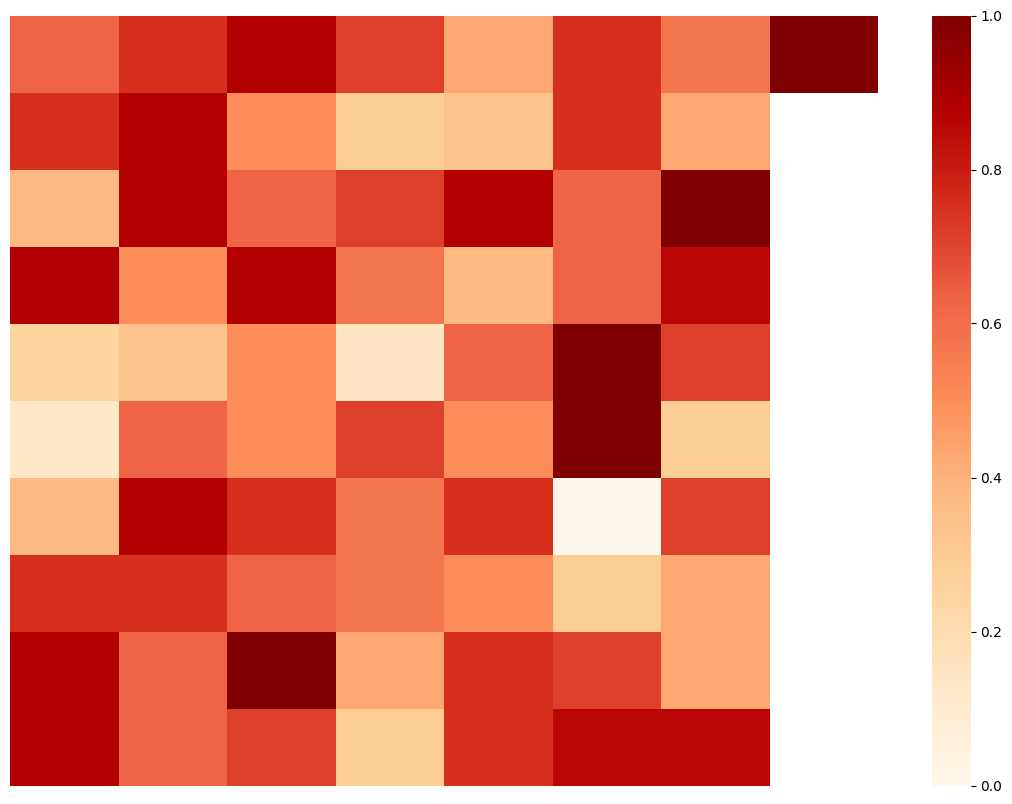

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fill the DataFrame up to 80 rows with NaN values
filled_data = seqFISH_groundtruth_byspot['Excitatory neuron'].values.tolist() + [np.nan] * (80 - seqFISH_groundtruth_byspot.shape[0])

# Convert the filled data to a DataFrame
filled_df = pd.DataFrame(filled_data)

# Reshape the data to an 8x10 matrix
data_matrix = filled_df.values.reshape(8, 10).T

# Create a figure and axis
plt.figure(figsize=(14, 10))

# Create a heatmap using Seaborn
# colour: gradient of orange
# not show number in the heatmap
sns.heatmap(data_matrix, cmap='OrRd', annot=False)

plt.xticks([])
plt.yticks([])
plt.show()

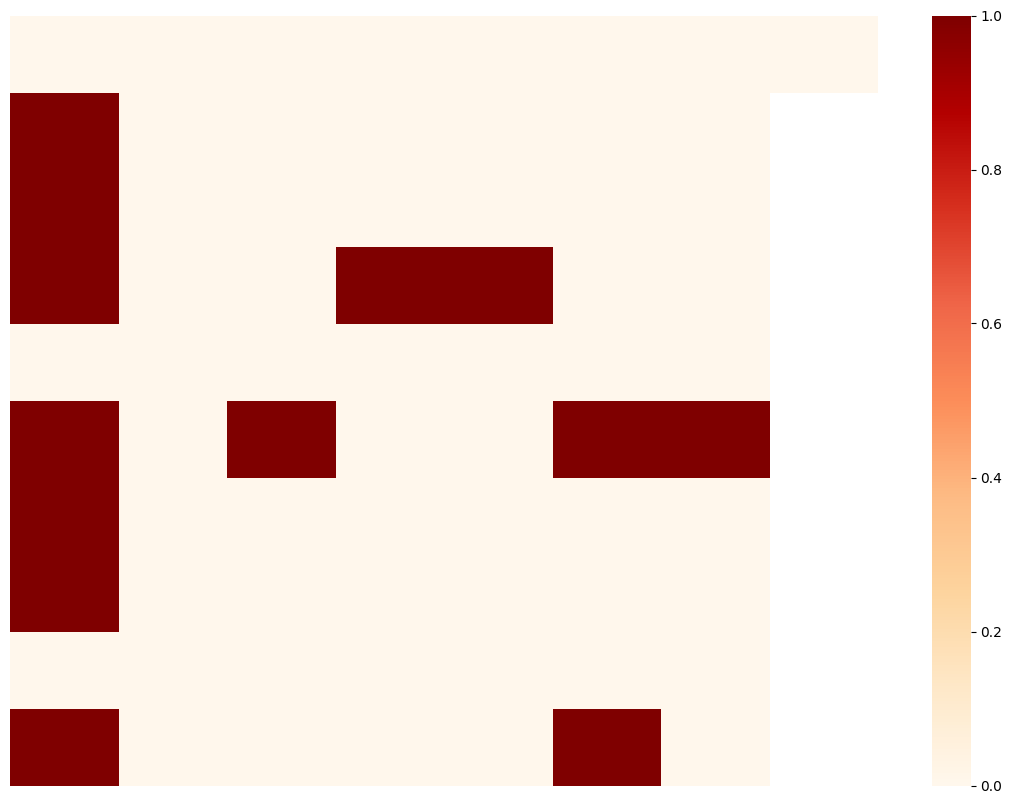

In [28]:
SPOTlight = 'methods/SPOTlight_pred_cell.csv'

SPOTlight_df = pd.read_csv(SPOTlight, header=0)
filled_SPOTlight = SPOTlight_df['eNeuron'].values.tolist() + [np.nan] * (80 - SPOTlight_df.shape[0])

SPOTlight_mat = pd.DataFrame(filled_SPOTlight).values.reshape(8, 10).T

plt.figure(figsize=(14, 10))
sns.heatmap(SPOTlight_mat, cmap='OrRd', annot=False)
plt.xticks([])
plt.yticks([])
plt.show()

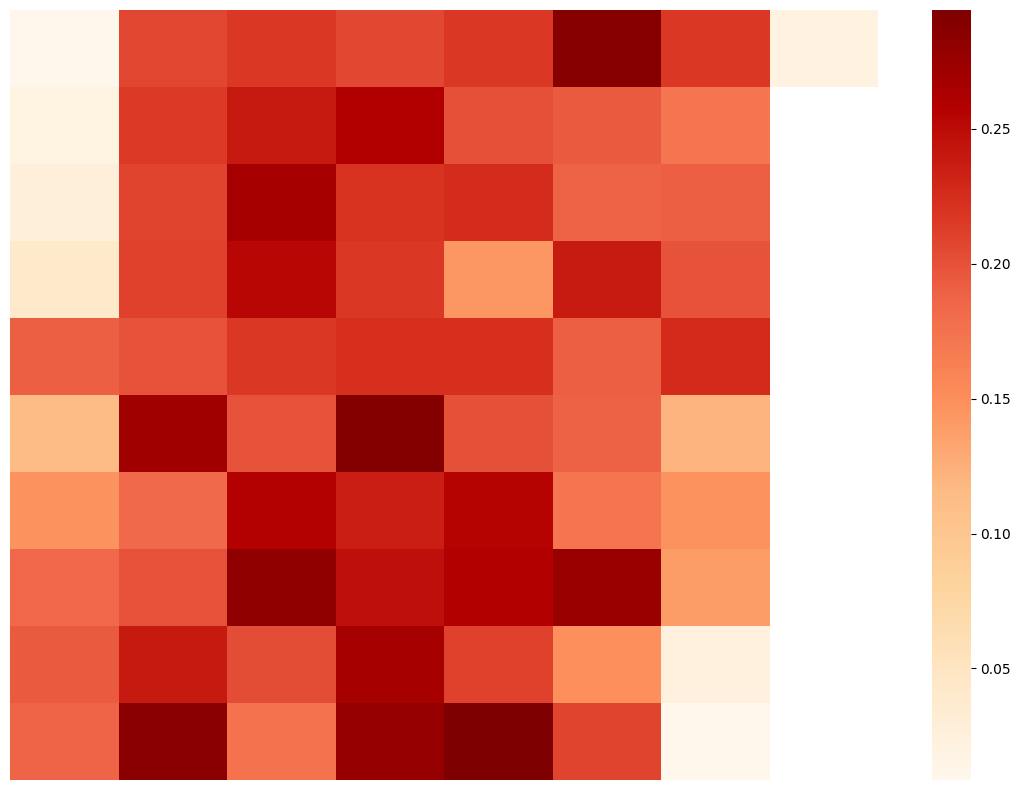

In [29]:
Cell2loc = 'methods/Cell2location.csv'

Cell2loc_df = pd.read_csv(Cell2loc, header=0)
filled_Cell2loc = Cell2loc_df['meanscell_abundance_w_sf_eNeuron'].values.tolist() + [np.nan] * (80 - Cell2loc_df.shape[0])

Cell2loc_mat = pd.DataFrame(filled_Cell2loc).values.reshape(8, 10).T

plt.figure(figsize=(14, 10))
sns.heatmap(Cell2loc_mat, cmap='OrRd', annot=False)
plt.xticks([])
plt.yticks([])
plt.show()

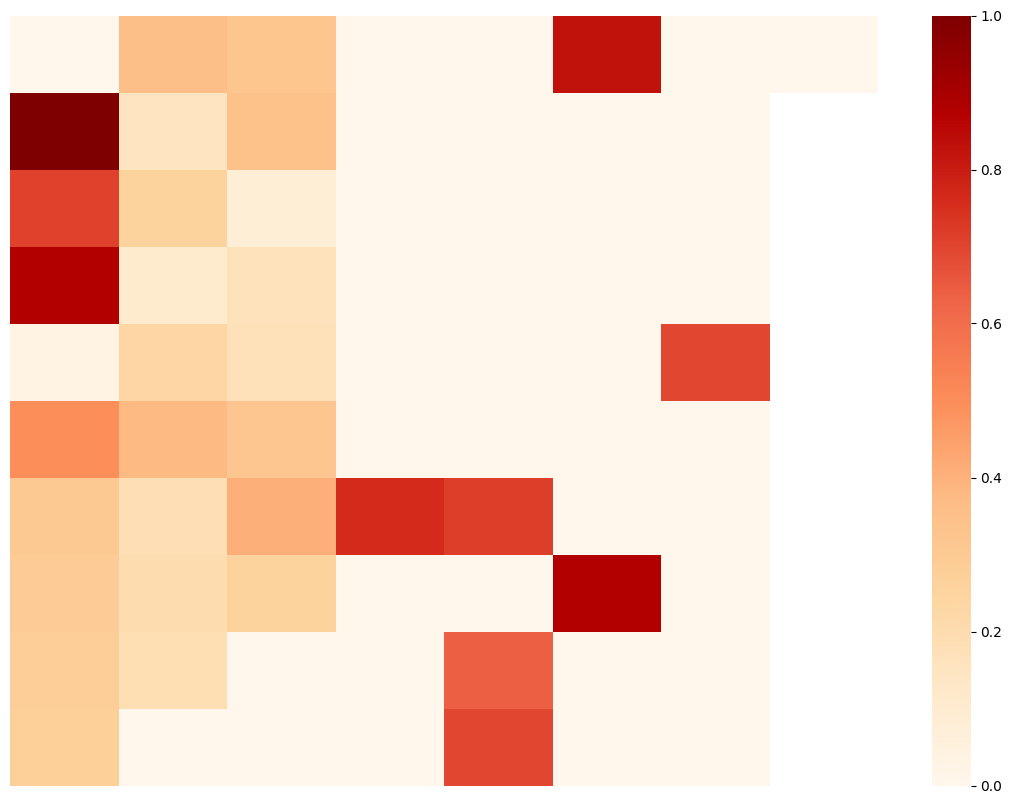

In [30]:
spatialdwls = 'methods/SpatialDWLS_seqFISH_10000.csv'

spatialdwls_df = pd.read_csv(spatialdwls, header=0)
filled_spatialdwls = spatialdwls_df['eNeuron'].values.tolist() + [np.nan] * (80 - spatialdwls_df.shape[0])

spatialdwls_mat = pd.DataFrame(filled_spatialdwls).values.reshape(8, 10).T

plt.figure(figsize=(14, 10))
sns.heatmap(spatialdwls_mat, cmap='OrRd', annot=False)
plt.xticks([])
plt.yticks([])
plt.show()